## Predicting election results using ANES (American National Election Study) data

You will use data from [ANES (American National Election Study)](https://electionstudies.org/data-center/) to build prediction models using decision trees and random forest for this session. Please download it from the Github repository [here](https://downgit.github.io/#/home?url=https://github.com/AashitaK/Claremont-Graduate-University-Guest-Lecture/blob/main/data/anes.csv).

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore') 

import matplotlib.pyplot as plt
import seaborn as sns # Comment this if seaborn is not installed
%matplotlib inline

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('anes.csv')

df.head()

,race,incgroup,education,classpercep,votenat,votepresid,votecong,voteincumb,prevote,voteintactual,voterpref,novoterpref,mobiliz,poldiscuss,jobscale,numcandidat,close,staterace
0,"6. Other or multiple races, non-Hispanic (1968...",4. 68 to 95 percentile,"5. Some college, no degree; junior/community c...",4. Average middle,"2. Yes, voted",2. Republican,2. Republican,9. R did not vote or DK/NA if voted; R voted but,2. Republican candidate (with or without quali...,9. INTENDED Republican: voted Republican,5. Not strong,0. R voted or DK/NA/refused to say if voted (for,2. Yes,1. Yes,7. Government let each person get ahead on his...,2. Two or more major party candidates,3. Win by quite a bit,1. U.S. Senate race in state
1,1. White non-Hispanic (1948-2012),3. 34 to 67 percentile,"3. 12 grades, diploma or equivalency",1. Average working,0. DK; NA; no Post IW; refused to say if voted;,0. Did not vote; DK/NA if voted; refused to sa...,0. DK; NA; R did not vote; R refused to say if,9. R did not vote or DK/NA if voted; R voted but,2. Republican candidate (with or without quali...,0. NA who will vote for; no Pre IW; no Post IW;,9. NA; no Post IW; abbrev. telephone IW (1984),9. DK; NA; refused; no Post IW,"0. DK; NA; no Post IW; form III,IV (1972);",9. NA; no Post IW,9. DK; haven't thought much about it,9. NA; no Post IW; abbrev. telephone IW (1984);,3. Win by quite a bit,9. no Post IW; Washington D.C.
2,1. White non-Hispanic (1948-2012),4. 68 to 95 percentile,6. BA level degrees,4. Average middle,"2. Yes, voted",2. Republican,2. Republican,9. R did not vote or DK/NA if voted; R voted but,2. Republican candidate (with or without quali...,9. INTENDED Republican: voted Republican,1. Strong,0. R voted or DK/NA/refused to say if voted (for,2. Yes,1. Yes,5,2. Two or more major party candidates,3. Win by quite a bit,1. U.S. Senate race in state
3,1. White non-Hispanic (1948-2012),4. 68 to 95 percentile,"3. 12 grades, diploma or equivalency",1. Average working,"1. No, did not vote",0. Did not vote; DK/NA if voted; refused to sa...,0. DK; NA; R did not vote; R refused to say if,9. R did not vote or DK/NA if voted; R voted but,2. Republican candidate (with or without quali...,6. INTENDED Republican: did not vote/voted 'ot...,0. R did not vote or DK/NA/refused to say if v...,2. Preference: Republican,1. No,5. No,5,2. Two or more major party candidates,1. Close race,1. U.S. Senate race in state
4,1. White non-Hispanic (1948-2012),4. 68 to 95 percentile,6. BA level degrees,4. Average middle,"2. Yes, voted",2. Republican,1. Democrat,9. R did not vote or DK/NA if voted; R voted but,2. Republican candidate (with or without quali...,9. INTENDED Republican: voted Republican,1. Strong,0. R voted or DK/NA/refused to say if voted (for,1. No,1. Yes,9. DK; haven't thought much about it,2. Two or more major party candidates,3. Win by quite a bit,1. U.S. Senate race in state


In [2]:
df.shape

(8236, 18)

Let us check if there are any missing values in the dataset using [`isnull()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) and [`sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) functions piped one after the other.

In [3]:
df.isnull().sum()

race             0
incgroup         0
education        0
classpercep      0
votenat          0
votepresid       0
votecong         0
voteincumb       0
prevote          0
voteintactual    0
voterpref        0
novoterpref      0
mobiliz          0
poldiscuss       0
jobscale         0
numcandidat      0
close            0
staterace        0
dtype: int64

No missing values in the dataset!

Let us check the different columns in the dataset.

In [4]:
df.columns

Index(['race', 'incgroup', 'education', 'classpercep', 'votenat', 'votepresid',
       'votecong', 'voteincumb', 'prevote', 'voteintactual', 'voterpref',
       'novoterpref', 'mobiliz', 'poldiscuss', 'jobscale', 'numcandidat',
       'close', 'staterace'],
      dtype='object')

* race : Race-ethnicity summary, 7 categories
* incgroup : DEMOGRAPHICS: Respondent Family - Income Group
* education : DEMOGRAPHICS: Respondent - Education, 7-categories
* classpercep : DEMOGRAPHICS: Respondent - Average or Upper Middle/Working Class 
* votenat : ELECTION: Did Respondent Vote in the National Elections
* votepresid : ELECTION: Vote for President- Major Parties and Other
* votecong : ELECTION: Vote for Congressman
* voteincumb : ELECTION: Did Respondent Vote for Incumbent U.S. House Candidate
* prevote : ELECTION: Respondent Pre-election Intent for Vote for President
* voteintactual : ELECTION: Intended Presidential Vote versus Actual Presidential Vote 
* voterpref : ELECTION: Voter Strength of Preference - Presidential Cand 
* novoterpref : ELECTION: Nonvoter Strength of Preference- Presidential Cand 
* mobiliz : MOBILIZATION: Respondent Try to Influence the Vote of Others During the Campaign
* poldiscuss : POLITICAL ENGAGEMENT: Respondent Discuss Politics with Family and Friends
* jobscale : ISSUES: Guaranteed Jobs and Income Scale
* numcandidat: ELECTION/RACE DESCRIPTION: Number of Candidates in U.S. House Race
* close : POLITICAL ENGAGEMENT: Which Presidential Race in State Be Close
* staterace : ELECTION/RACE DESCRIPTION: Senate Race in State

Let us see how many respondents voted in the national elections.

In [5]:
df['votenat'].value_counts()

2. Yes, voted                                      6007
1. No, did not vote                                1605
0. DK; NA; no Post IW; refused to say if voted;     624
Name: votenat, dtype: int64

This can be represented as a piechart:

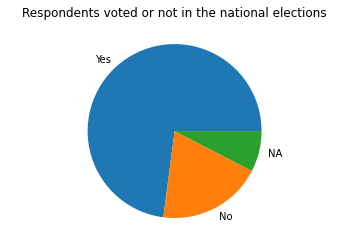

In [6]:
plt.axis('equal') 
plt.title("Respondents voted or not in the national elections")
plt.pie(df['votenat'].value_counts(), labels=('Yes', 'No', 'NA'));

Let us check all the values in the *race* column using `unique()` function on the `race` column.

In [7]:
df['race'].unique()

array(['6. Other or multiple races, non-Hispanic (1968-2012)',
       '1. White non-Hispanic (1948-2012)',
       '2. Black non-Hispanic (1948-2012)', '5. Hispanic (1966-2012)',
       '4. American Indian or Alaska Native non-Hispanic (1966-2012)',
       '3. Asian or Pacific Islander, non-Hispanic (1966-2012)',
       '9. Missing'], dtype=object)

In [8]:
df['race'].value_counts()

1. White non-Hispanic (1948-2012)                               4656
2. Black non-Hispanic (1948-2012)                               1587
5. Hispanic (1966-2012)                                         1532
6. Other or multiple races, non-Hispanic (1968-2012)             241
3. Asian or Pacific Islander, non-Hispanic (1966-2012)           125
9. Missing                                                        48
4. American Indian or Alaska Native non-Hispanic (1966-2012)      47
Name: race, dtype: int64

In [9]:
for col in df.columns:
    print("Column:", col)
    print(df[col].value_counts(), sep="\n")
    print()

Column: race
1. White non-Hispanic (1948-2012)                               4656
2. Black non-Hispanic (1948-2012)                               1587
5. Hispanic (1966-2012)                                         1532
6. Other or multiple races, non-Hispanic (1968-2012)             241
3. Asian or Pacific Islander, non-Hispanic (1966-2012)           125
9. Missing                                                        48
4. American Indian or Alaska Native non-Hispanic (1966-2012)      47
Name: race, dtype: int64

Column: incgroup
3. 34 to 67 percentile                     2832
4. 68 to 95 percentile                     1772
1. 0 to 16 percentile                      1583
2. 17 to 33 percentile                     1323
0. DK; NA; refused to answer; no Pre IW     382
5. 96 to 100 percentile                     344
Name: incgroup, dtype: int64

Column: education
5. Some college, no degree; junior/community college           2324
3. 12 grades, diploma or equivalency                     

Note: 
* R stands for Respondent
* DK stands for Don't Know
* NA stands for Not Applicable or Not Available
* RF stands for refused to say
* Pre IW stands for Pre-election interviews (two months prior to elections)
* Post IW stands for Pre-election reinterviewing

Please take a close look at the columns. 

Notice that all the categories are represented by numerals that are in single digit. We use regular expressions package `re` to extract the numerical categories for all the columns, similar to what we did for extracting titles from the names in Titanic dataset.

In [10]:
import re

def extract_category(x):
    cat = re.findall("\d", x)[0]
    return cat

old_df = df.copy() 
for col in df.columns:
    df[col] = df[col].map(extract_category).astype('category')

df.head()

,race,incgroup,education,classpercep,votenat,votepresid,votecong,voteincumb,prevote,voteintactual,voterpref,novoterpref,mobiliz,poldiscuss,jobscale,numcandidat,close,staterace
0,6,4,5,4,2,2,2,9,2,9,5,0,2,1,7,2,3,1
1,1,3,3,1,0,0,0,9,2,0,9,9,0,9,9,9,3,9
2,1,4,6,4,2,2,2,9,2,9,1,0,2,1,5,2,3,1
3,1,4,3,1,1,0,0,9,2,6,0,2,1,5,5,2,1,1
4,1,4,6,4,2,2,1,9,2,9,1,0,1,1,9,2,3,1


Now, we have the data cleaned up, you should proceed to work on this dataset on your own. Following are some ideas to guide you in the process. Please feel free to reach out to the instructor to ask for help/discuss.

Exploratory data analysis of the features using graphs and other means:
* Intented vs actual vote for presidential canditate
* How race, education, income group, etc. affect the vote?

Build models (using Decision Trees and/or Random Forest) to predict:
* whether a respondent voted or not for the national election (Target for atleast 75% accuracy on the validation set)
* vote for president (Target for atleast 70% accuracy on the validation set)
* vote for congressman (optional)

Tips:
* Start with a basic model with minimal features 
* Try adding/removing features to see how it affects the model. 
* Try removing rows with certain conditions. For example, while building the prediction model for presidential election:
    * you can use `df = df[df['votenat']=='2']` to filter only the respondents who voted in the elections. 
    * you can simplify the model by restricting to respondents that voted either Republican or Democratic.
* Use creativity in feature engineering 

***Important note: Beware of Data Leakage while building models:***
* Do not use a feature that inadvertently reveal information about the target variable that was not supposed to be known. For example, for predicting the target variable `votepresid`, you cannot use `votecong` and vice versa.  

At the end, make a copy of the notebook and clean it all up to present the analysis and model in a clear and coherent manner. It would be a great idea to share your work as a blog using [Github Pages](https://help.github.com/en/articles/what-is-github-pages).

For your reference:
* race : Race-ethnicity summary, 7 categories
* incgroup : DEMOGRAPHICS: Respondent Family - Income Group
* education : DEMOGRAPHICS: Respondent - Education, 7-categories
* classpercep : DEMOGRAPHICS: Respondent - Average or Upper Middle/Working Class 
* votenat : ELECTION: Did Respondent Vote in the National Elections
* votepresid : ELECTION: Vote for President- Major Parties and Other
* votecong : ELECTION: Vote for Congressman
* voteincumb : ELECTION: Did Respondent Vote for Incumbent U.S. House Candidate
* prevote : ELECTION: Respondent Pre-election Intent for Vote for President
* voteintactual : ELECTION: Intended Presidential Vote versus Actual Presidential Vote 
* voterpref : ELECTION: Voter Strength of Preference - Presidential Cand 
* novoterpref : ELECTION: Nonvoter Strength of Preference- Presidential Cand 
* mobiliz : MOBILIZATION: Respondent Try to Influence the Vote of Others During the Campaign
* poldiscuss : POLITICAL ENGAGEMENT: Respondent Discuss Politics with Family and Friends
* jobscale : ISSUES: Guaranteed Jobs and Income Scale
* numcandidat: ELECTION/RACE DESCRIPTION: Number of Candidates in U.S. House Race
* close : POLITICAL ENGAGEMENT: Which Presidential Race in State Be Close
* staterace : ELECTION/RACE DESCRIPTION: Senate Race in State

Note: 
* R stands for Respondent
* DK stands for Don't Know
* NA stands for Not Applicable or Not Available
* RF stands for refused to say
* Pre IW stands for Pre-election interviews (two months prior to elections)
* Post IW stands for Pre-election reinterviewing

In [11]:
df.columns

Index(['race', 'incgroup', 'education', 'classpercep', 'votenat', 'votepresid',
       'votecong', 'voteincumb', 'prevote', 'voteintactual', 'voterpref',
       'novoterpref', 'mobiliz', 'poldiscuss', 'jobscale', 'numcandidat',
       'close', 'staterace'],
      dtype='object')